## About this Project 

- Lecture name : 2022 K-Digital Training- Big Data analysis using AI Data Platforms
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- Project name : Kaggle Forecasting competition using Bike Sharing Demand Data
- Poject Eng Date : July 19th 2022
- Name : Hyung Ju Cha


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## step 01. Loading necessary libraries
- 주석

In [2]:
#data visualization and manipulation

import pandas as pd # Data processing
import numpy as np # Calculation
import matplotlib as mpl # Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns # Visualization
import missingno as msno

import sklearn # Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Regression  
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection 

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
 


# Version Check
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
# matplotlib
# sklearn
# seaborn

pandas version : 1.3.5
numpy version : 1.21.6


## step 02. Loading Data
- Load Data. 

In [3]:
DATA_PATH = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(DATA_PATH + 'train.csv') # 훈련 데이터
test = pd.read_csv(DATA_PATH + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(DATA_PATH + 'sampleSubmission.csv') # 제출 샘플 데이터
train.shape, test.shape, submission.shape

((10886, 12), (6493, 9), (6493, 2))

## step 03. 데이터 확인하기

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


- 현재 판단으로는 결측치가 없어 보임. 

## step 03. Exploratory data analysis
- visualization
- date based
- Changing train data directly might cause confusion 
- Make a copy. (Exploratory data analysis)
- Very small dataset
    + We can use entire dataset
    + sample a part of entire data

In [6]:
temp_df = train.copy()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

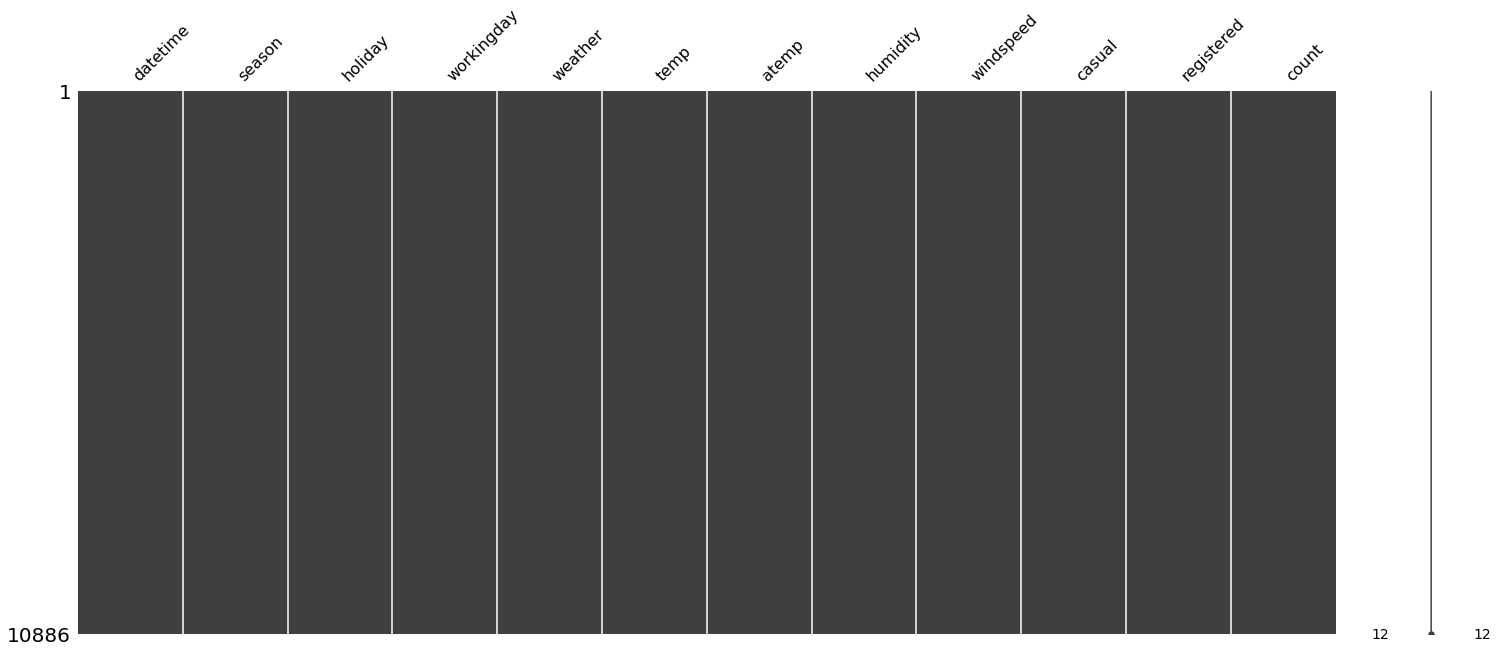

In [7]:
# visualizing missing value
msno.matrix(temp_df)

- 시각화를 위한 날짜 데이터 처리
- 연도, 월, 일자, 시간, 분, 초


In [8]:
temp_df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [9]:
print(temp_df['datetime'][0].split()[1])
print(temp_df['datetime'][100].split()[0].split('-')[2])

00:00:00
05


In [10]:
year = temp_df['datetime'][100].split()[0].split('-')[0]
month = temp_df['datetime'][100].split()[0].split('-')[1]
day = temp_df['datetime'][100].split()[0].split('-')[2]

year, month, day

('2011', '01', '05')

In [11]:
hour = temp_df['datetime'][2].split()[1].split(':')[0]
minutes = temp_df['datetime'][2].split()[1].split(':')[1]
seconds = temp_df['datetime'][2].split()[1].split(':')[2]

hour, minutes, seconds

('02', '00', '00')

In [12]:
temp_df['datetime'][0].split()[0]

'2011-01-01'

- Method to preprocess time data 

In [13]:
import time 
import datetime 

# 시간 테스트 
start_time = time.time()

temp_df['date'] = temp_df['datetime'].apply(lambda x : x.split()[0])
temp_df['year'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[0])
temp_df['month'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[1])
temp_df['day'] = temp_df['datetime'].apply(lambda x : x.split()[0].split('-')[2])
temp_df['hour'] = temp_df['datetime'].apply(lambda x : x.split()[1].split(':')[0])

end_time = time.time() 
lambda_ctime = end_time - start_time

print("실행시간 (second) -> ", np.round(lambda_ctime, 3))
temp_df[['datetime', 'year', 'month', 'day', 'hour']]

실행시간 (second) ->  0.031


,datetime,year,month,day,hour
0,2011-01-01 00:00:00,2011,01,01,00
1,2011-01-01 01:00:00,2011,01,01,01
2,2011-01-01 02:00:00,2011,01,01,02
3,2011-01-01 03:00:00,2011,01,01,03
4,2011-01-01 04:00:00,2011,01,01,04
...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,2012,12,19,22


- Method to preprocess time data 2

In [14]:
temp_df['date'] = pd.to_datetime(temp_df['datetime'])
temp_df['year'] = temp_df['date'].dt.year


In [15]:
import time 
import datetime 

# 시간 테스트 
start_time = time.time()

temp_df['date'] = pd.to_datetime(temp_df['datetime'])
temp_df['year'] = temp_df['date'].dt.year
temp_df['month'] = temp_df['date'].dt.month
temp_df['day'] = temp_df['date'].dt.day
temp_df['hour'] = temp_df['date'].dt.hour

end_time = time.time() 
dt_ctime = end_time - start_time

print("실행시간 (second) -> ", np.round(dt_ctime, 3))

temp_df[['datetime', 'year', 'month', 'day', 'hour']]

실행시간 (second) ->  0.011


,datetime,year,month,day,hour
0,2011-01-01 00:00:00,2011,1,1,0
1,2011-01-01 01:00:00,2011,1,1,1
2,2011-01-01 02:00:00,2011,1,1,2
3,2011-01-01 03:00:00,2011,1,1,3
4,2011-01-01 04:00:00,2011,1,1,4
...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,2012,12,19,22


In [16]:
temp_df['date']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: date, Length: 10886, dtype: datetime64[ns]

-extract date data 

In [17]:
temp_df['date']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: date, Length: 10886, dtype: datetime64[ns]

In [18]:
temp_df['weekday'] = temp_df['date'].dt.day_name()
temp_df['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

In [19]:
temp_df['season'] = temp_df['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

temp_df['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: season, Length: 10886, dtype: object

In [20]:
temp_df['weather'] = temp_df['weather'].map({
    1 : 'Clear', 
    2 : 'Few clouds', 
    3 : 'Light Snow, Rain', 
    4 : 'Heavy Snow, Rain'
})

temp_df['weather']

0        Clear
1        Clear
2        Clear
3        Clear
4        Clear
         ...  
10881    Clear
10882    Clear
10883    Clear
10884    Clear
10885    Clear
Name: weather, Length: 10886, dtype: object

In [21]:
temp_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,Saturday


## step 04. Data Visualization
- a figure-predicting contest
- Dependent variables must be visualized.
- After checking the distribution, you need to decide whether to give or not to give the log transform.

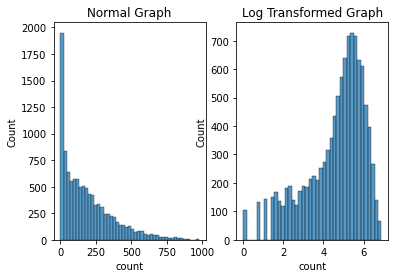

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

sns.histplot(train['count'], ax = ax[0]) 
sns.histplot(np.log(train['count']), ax = ax[1])

# 옵션 제목
ax[0].set_title('Normal Graph')
ax[1].set_title("Log Transformed Graph")

plt.show()

- Bar plot
    + year, count 
    + month, count
    + day, count 
    + hour, count
- 각 그래프의 타이틀 추가 

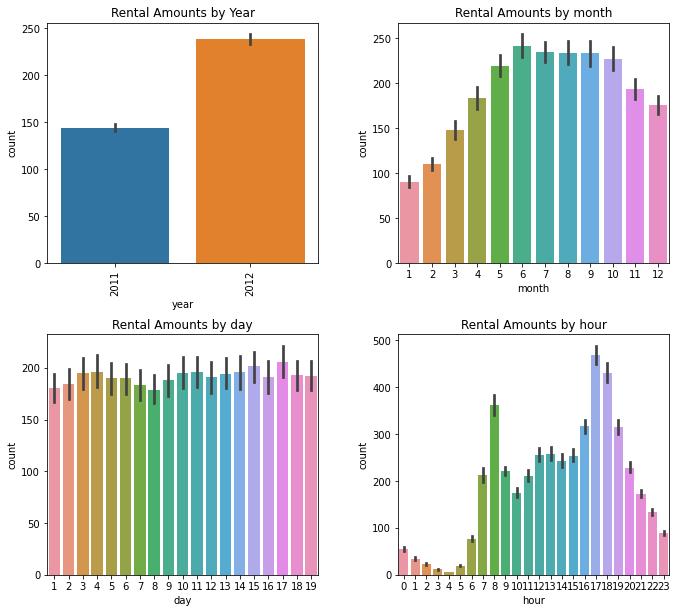

In [23]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

## 1단계 : 전체 그래프 기본 설정
# 그래프 사이 간격
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계 :  각 개별 그래프 입력
sns.barplot(x = 'year', y = 'count', data = temp_df, ax=ax[0,0])
sns.barplot(x = 'month',y = 'count', data = temp_df, ax=ax[0,1])
sns.barplot(x = 'day', y = 'count', data = temp_df, ax=ax[1,0])
sns.barplot(x = 'hour', y = 'count', data = temp_df, ax=ax[1,1])

## 3단계 : 디테일 옵션
ax[0, 0].set_title("Rental Amounts by Year")
ax[0, 1].set_title("Rental Amounts by month")
ax[1, 0].set_title("Rental Amounts by day")
ax[1, 1].set_title("Rental Amounts by hour")

ax[0, 0].tick_params(axis = 'x', labelrotation=90)

plt.show()

- boxplot
    + season, count
    + weather, count
    + holiday, count
    + workingday, count

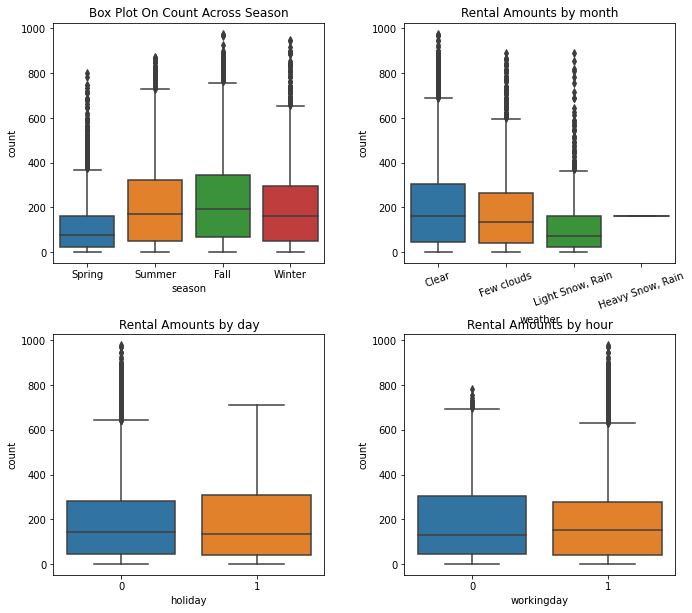

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

## 1단계 : 전체 그래프 기본 설정
# 그래프 사이 간격
fig.tight_layout()

# 전체 그래프 사이즈 관리
fig.set_size_inches(10, 9)

## 2단계 :  각 개별 그래프 입력
sns.boxplot(x = 'season', y = 'count', data = temp_df, ax=ax[0,0])
sns.boxplot(x = 'weather',y = 'count', data = temp_df, ax=ax[0,1])
sns.boxplot(x = 'holiday', y = 'count', data = temp_df, ax=ax[1,0])
sns.boxplot(x = 'workingday', y = 'count', data = temp_df, ax=ax[1,1])

## 3단계 : 디테일 옵션
ax[0, 0].set_title("Box Plot On Count Across Season")
ax[0, 1].set_title("Rental Amounts by month")
ax[1, 0].set_title("Rental Amounts by day")
ax[1, 1].set_title("Rental Amounts by hour")

ax[0, 1].tick_params(axis = 'x', labelrotation=20)

plt.show()

- 포인트 플롯
- 5개의 행 그래프 작성
    + workingday, holiday, weekday, season, weather
 - 5개의 그래프를 한 이미지로 그리세요. 

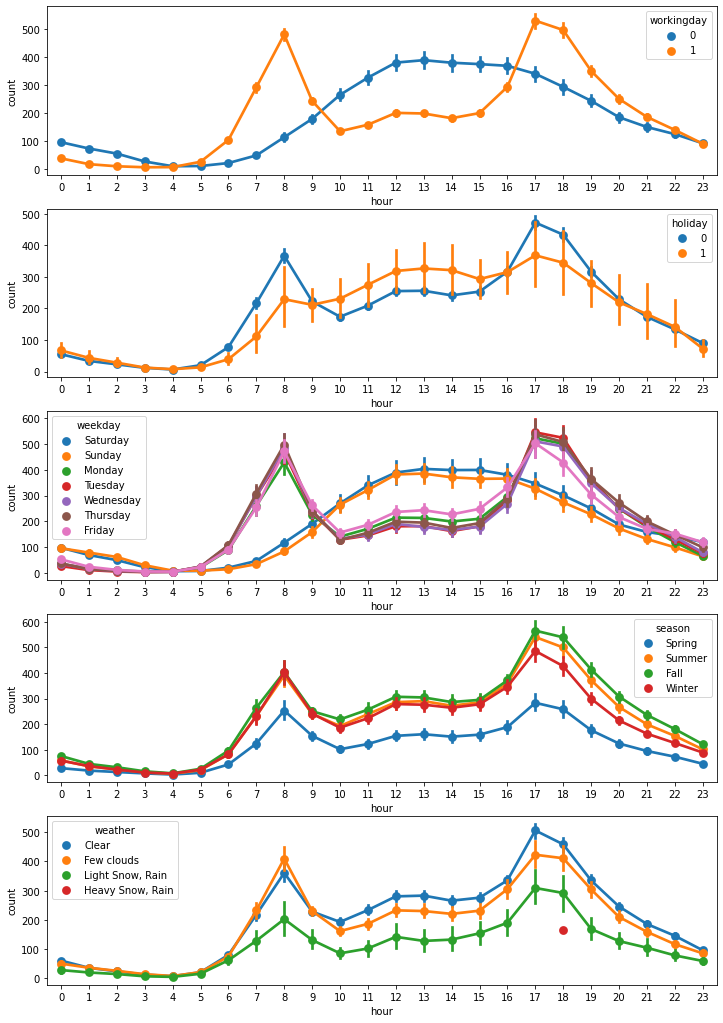

In [25]:
fig, ax = plt.subplots(nrows = 5)
fig.set_size_inches(12, 18)

sns.pointplot(x = 'hour', y = 'count', hue = 'workingday', data = temp_df, ax = ax[0])
sns.pointplot(x = 'hour', y = 'count', hue = 'holiday', data = temp_df, ax = ax[1])
sns.pointplot(x = 'hour', y = 'count', hue = 'weekday', data = temp_df, ax = ax[2])
sns.pointplot(x = 'hour', y = 'count', hue = 'season', data = temp_df, ax = ax[3])
sns.pointplot(x = 'hour', y = 'count', hue = 'weather', data = temp_df, ax = ax[4])

plt.show()

- 회귀선을 포함한 산점도 그래프
    + x, y 모두 수치형 그래프여야 함. 
    + 연속형 수치형 데이터야 함. 
- 총 4개의 그래프가 나와야 함. 

In [26]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  object        
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  datetime64[ns]
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [27]:
temp_df['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

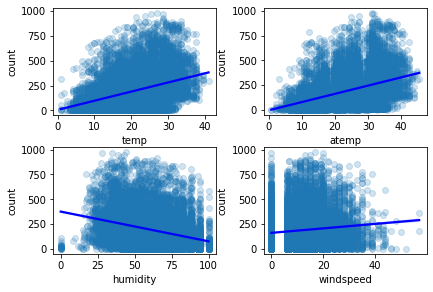

In [28]:
fig, ax = plt.subplots(nrows=2, ncols =2)

fig.tight_layout()

sns.regplot(x ='temp', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[0, 0])
sns.regplot(x ='atemp', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[0, 1])
sns.regplot(x ='humidity', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[1, 0])
sns.regplot(x ='windspeed', y ='count', data = temp_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'blue'}, ax = ax[1, 1])
plt.show()

- 히트맵 그래프 그리기
- 상관계수 해석
    + 수치가 양수다 (양의 관계)
    + 수치가 음수다 (음의 관계)
    + 0~0.2 : 두 변수 사이의 상관관계는 없다. 
    + 0.2 ~ 1: 값이 커지면 커질수록 두 변수 간 상관관계는 크다. 
    

In [29]:
corrMat = temp_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
corrMat

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


<AxesSubplot:>

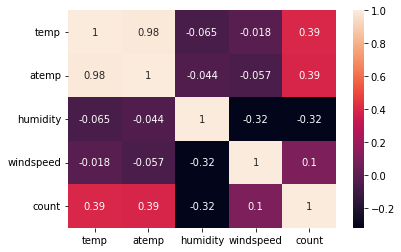

In [30]:
sns.heatmap(corrMat, annot=True)

## Data Preprocessing
- First: Remove the causal, registered column of the train data
- Second: Date data processing, dt.month, so on
- Third: Season column processing is required (change the number to characters
+ Encoding conversion (label encoding, one-hot encoding)
- Fourth: Weather column processing required (change the number to characters)
+ Encoding conversion (label encoding, one-hot encoding)
- 5th: Month, day column to be deleted
- 6th: Delete weather data with 4 (outliers)
- 7th: Delete windspeed column
- Eighth: delete temp or atemp (optional)
- Last: Encoding all characters to numbers (one-hot encoding)

### 첫번째
- train 데이터의 causal, registered 컬럼 제거

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [32]:
train = train.drop(['casual', 'registered'], axis = 1)
train.shape

(10886, 10)

In [33]:
## weather 컬럼 지우기 
train = train[train['weather'] != 4].reset_index(drop=True)
train.shape

(10885, 10)

### 데이터 합치기
- train, test 데이터 합치기

In [34]:
all_data = pd.concat([train, test], ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17378 non-null  object 
 1   season      17378 non-null  int64  
 2   holiday     17378 non-null  int64  
 3   workingday  17378 non-null  int64  
 4   weather     17378 non-null  int64  
 5   temp        17378 non-null  float64
 6   atemp       17378 non-null  float64
 7   humidity    17378 non-null  int64  
 8   windspeed   17378 non-null  float64
 9   count       10885 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


### 두번째 & 다섯번째 
- 날짜 데이터 처리, dt.month, 이렇게 할 것
- month, day 컬럼 삭제 예정

In [35]:
all_data['date'] = pd.to_datetime(all_data['datetime'])
all_data['year'] = all_data['date'].dt.year
all_data['hour'] = all_data['date'].dt.hour
all_data['weekday'] = all_data['date'].dt.day_name()

all_data.shape

(17378, 14)

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  int64         
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  int64         
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   windspeed   17378 non-null  float64       
 9   count       10885 non-null  float64       
 10  date        17378 non-null  datetime64[ns]
 11  year        17378 non-null  int64         
 12  hour        17378 non-null  int64         
 13  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(7), object(2)
memory usage: 1.9+ MB


### 세번째 
- season 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩) 

In [37]:
all_data['season'] = all_data['season'].map({
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
})

all_data.shape

(17378, 14)

In [38]:
all_data['season']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17373    Spring
17374    Spring
17375    Spring
17376    Spring
17377    Spring
Name: season, Length: 17378, dtype: object

### 네번째
- weather 컬럼 처리 필요 (숫자를 문자로 바꾸자)
    + 인코딩 변환 (라벨인코딩, 원핫 인코딩)


In [39]:
all_data['weather'] = all_data['weather'].map({
    1 : 'Clear', 
    2 : 'Few clouds', 
    3 : 'Light Snow, Rain', 
    4 : 'Heavy Snow, Rain'
})

all_data.shape

(17378, 14)

In [40]:
all_data['weather']

0             Clear
1             Clear
2             Clear
3             Clear
4             Clear
            ...    
17373    Few clouds
17374    Few clouds
17375         Clear
17376         Clear
17377         Clear
Name: weather, Length: 17378, dtype: object

### 다섯번째
- weather 4인 데이터는 삭제 (이상치)
    + 4 대신, 'Heavy Snow, Rain'

In [41]:
all_data.shape

(17378, 14)

In [42]:
all_data['weather'].value_counts()

Clear               11413
Few clouds           4544
Light Snow, Rain     1419
Heavy Snow, Rain        2
Name: weather, dtype: int64

In [43]:
#all_data = all_data[all_data['weather'] != 'Heavy Snow, Rain']
all_data.shape

(17378, 14)

## 일곱번째 
- windspeed 컬럼 삭제 

In [44]:
all_data = all_data.drop('windspeed', axis = 1)
all_data.shape

(17378, 13)

In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  object        
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  object        
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   count       10885 non-null  float64       
 9   date        17378 non-null  datetime64[ns]
 10  year        17378 non-null  int64         
 11  hour        17378 non-null  int64         
 12  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.7+ MB


### date 컬럼 제거


In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17378 non-null  object        
 1   season      17378 non-null  object        
 2   holiday     17378 non-null  int64         
 3   workingday  17378 non-null  int64         
 4   weather     17378 non-null  object        
 5   temp        17378 non-null  float64       
 6   atemp       17378 non-null  float64       
 7   humidity    17378 non-null  int64         
 8   count       10885 non-null  float64       
 9   date        17378 non-null  datetime64[ns]
 10  year        17378 non-null  int64         
 11  hour        17378 non-null  int64         
 12  weekday     17378 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 1.7+ MB


In [47]:
all_data = all_data.drop(['datetime', 'date'], axis = 1)
all_data.shape

(17378, 11)

### 원-핫 인코딩
- 

In [48]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)
all_data.shape

(17378, 23)

In [49]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   holiday                   17378 non-null  int64  
 1   workingday                17378 non-null  int64  
 2   temp                      17378 non-null  float64
 3   atemp                     17378 non-null  float64
 4   humidity                  17378 non-null  int64  
 5   count                     10885 non-null  float64
 6   year                      17378 non-null  int64  
 7   hour                      17378 non-null  int64  
 8   season_Fall               17378 non-null  uint8  
 9   season_Spring             17378 non-null  uint8  
 10  season_Summer             17378 non-null  uint8  
 11  season_Winter             17378 non-null  uint8  
 12  weather_Clear             17378 non-null  uint8  
 13  weather_Few clouds        17378 non-null  uint8  
 14  weathe

## 데이터셋 나누기
- 훈련데이터와 테스트 데이터로 재 나누기
- count 타깃 데이터(=종속 데이터)
    + 타깃 데이터가 있으면 훈련 데이터
    + 타깃 데이터가 없으면 테스트 데이터

In [60]:
train = all_data[~pd.isnull(all_data['count'])]
test = all_data[pd.isnull(all_data['count'])]
df = train.copy()
train.shape, test.shape

((10885, 23), (6493, 23))

- count 컬럼을 제거해야 함
- 타깃 데이터만 y로 추출
    + train, test count 컬럼 제거

In [61]:
y = train['count'] # 타깃값 

train = train.drop(['count'], axis = 1)
test = test.drop(['count'], axis = 1)

train.shape, test.shape

((10885, 22), (6493, 22))

<AxesSubplot:>

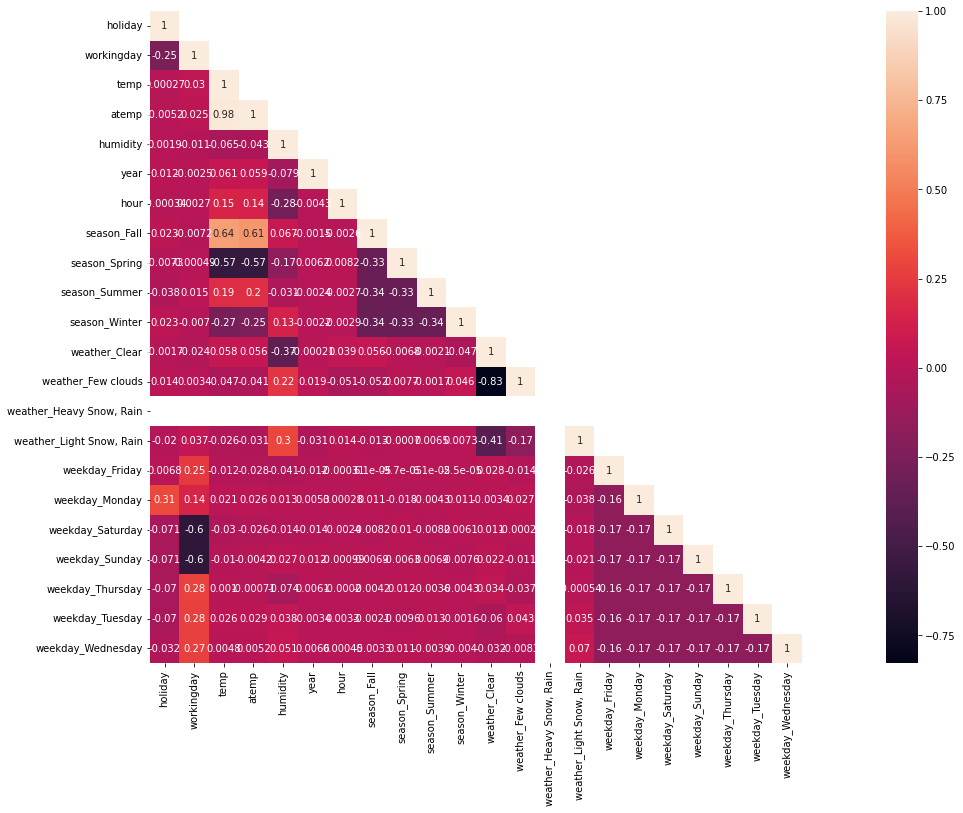

In [62]:
#corelation matrix.
cor_mat= train[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## 모델 훈련
- LinearRegression 모형만 학습

In [63]:
from sklearn.linear_model import LinearRegression
# train_test_split

lr_model = LinearRegression()

# 모형 학습 전
# 로그변환을 해준다. 
log_y = np.log(y)
lr_model.fit(train, log_y)

# 모형 예측
lr_preds = lr_model.predict(test)
lr_preds[:10]

array([2.37067025, 2.51692861, 2.61965969, 2.70791364, 2.81064472,
       2.79551553, 2.85117928, 3.02430512, 3.12703621, 3.47246024])

In [64]:
df.head()

,holiday,workingday,temp,atemp,humidity,count,year,hour,season_Fall,season_Spring,...,weather_Few clouds,"weather_Heavy Snow, Rain","weather_Light Snow, Rain",weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,0,9.84,14.395,81,16.0,2011,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,9.02,13.635,80,40.0,2011,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,9.02,13.635,80,32.0,2011,2,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,9.84,14.395,75,13.0,2011,3,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.84,14.395,75,1.0,2011,4,0,1,...,0,0,0,0,0,1,0,0,0,0


In [65]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [66]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.3301672632736096,
  1.0444280149223313,
  0.34146383708353817,
  1.466451720254416,
  0.6959327743610236]}

In [67]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.330167
1,AdaBoostRegressor,1.044428
2,BaggingRegressor,0.341464
3,SVR,1.466452
4,KNeighborsRegressor,0.695933


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


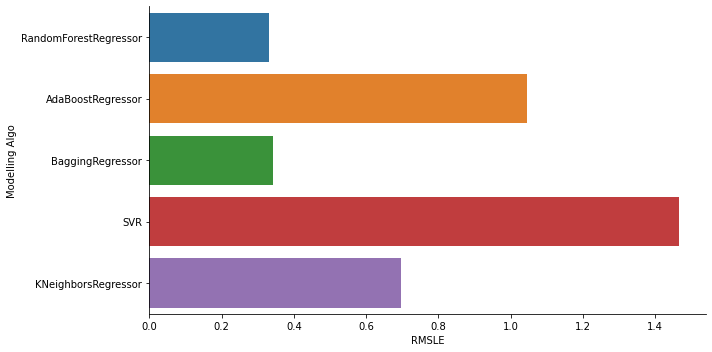

In [68]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


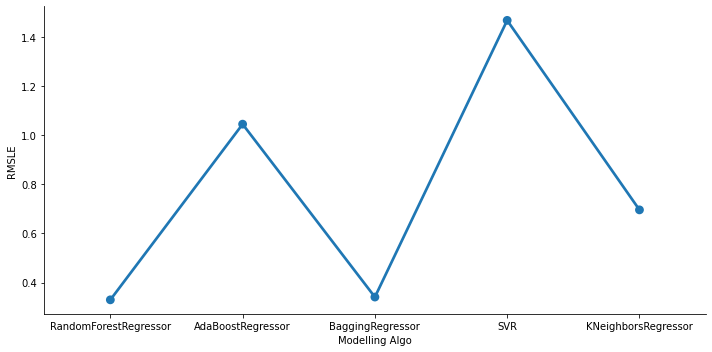

In [69]:
sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

- tuning hyperparemeters

In [78]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
rf_pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.6959327743610236


In [79]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [81]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(x_train,y_train)
knn_pred=clf_knn.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.6959327743610236


In [73]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 5}

## 모형 예측

In [ ]:
# 지수변환
final_preds = np.exp(lr_preds)
final_preds

In [82]:

submission=pd.DataFrame(rf_pred)
submission.to_csv('submission.csv', index=False)

In [ ]:
# all_data.info()